In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
training_set = pd.read_csv('/../Users/cynthia.maria/OneDrive - Happiest Minds Technologies Limited/Udemy-MachineLearning/ML Classification Package/3. Logisitic Regression/Train_Titanic.csv')


In [3]:
training_set.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
survived_no=training_set["Survived"].value_counts()[1]
dead_no =training_set["Survived"].value_counts()[0]


In [5]:
print("Total Data : ", len(training_set))
print("Number of Passengers survived : " ,survived_no)
print("Number of Passengers did not survive : " ,dead_no)

Total Data :  891
Number of Passengers survived :  342
Number of Passengers did not survive :  549


In [6]:
print(" % of Survived" , (survived_no/len(training_set)*100))
print(" % of Dead" , (dead_no/len(training_set)*100))

 % of Survived 38.38383838383838
 % of Dead 61.61616161616161


<AxesSubplot:xlabel='Pclass', ylabel='count'>

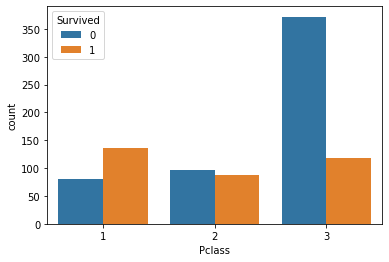

In [7]:
sns.countplot(x="Pclass", hue = "Survived", data = training_set)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

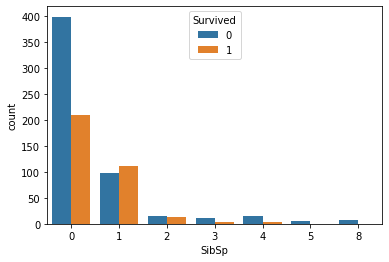

In [8]:
# plt.figure(figsize=[6,12])
sns.countplot(x="SibSp" ,hue = "Survived", data= training_set)

<AxesSubplot:xlabel='Parch', ylabel='count'>

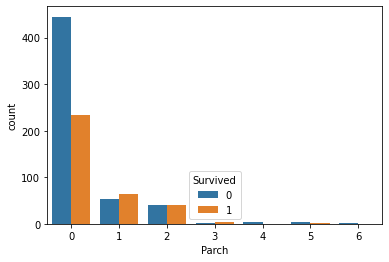

In [9]:
sns.countplot(x="Parch" ,hue = "Survived", data= training_set)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

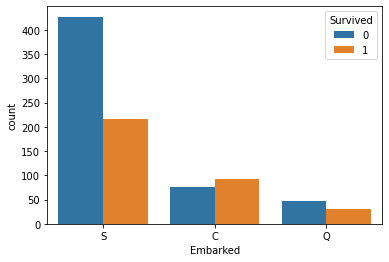

In [10]:
sns.countplot(x="Embarked" ,hue = "Survived", data= training_set)

<AxesSubplot:xlabel='Sex', ylabel='count'>

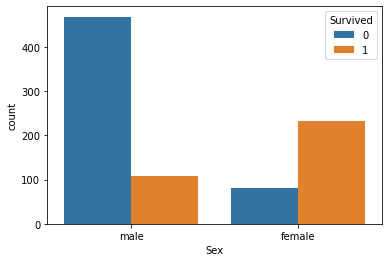

In [11]:
sns.countplot(x="Sex" ,hue = "Survived", data= training_set)

<AxesSubplot:xlabel='Age', ylabel='count'>

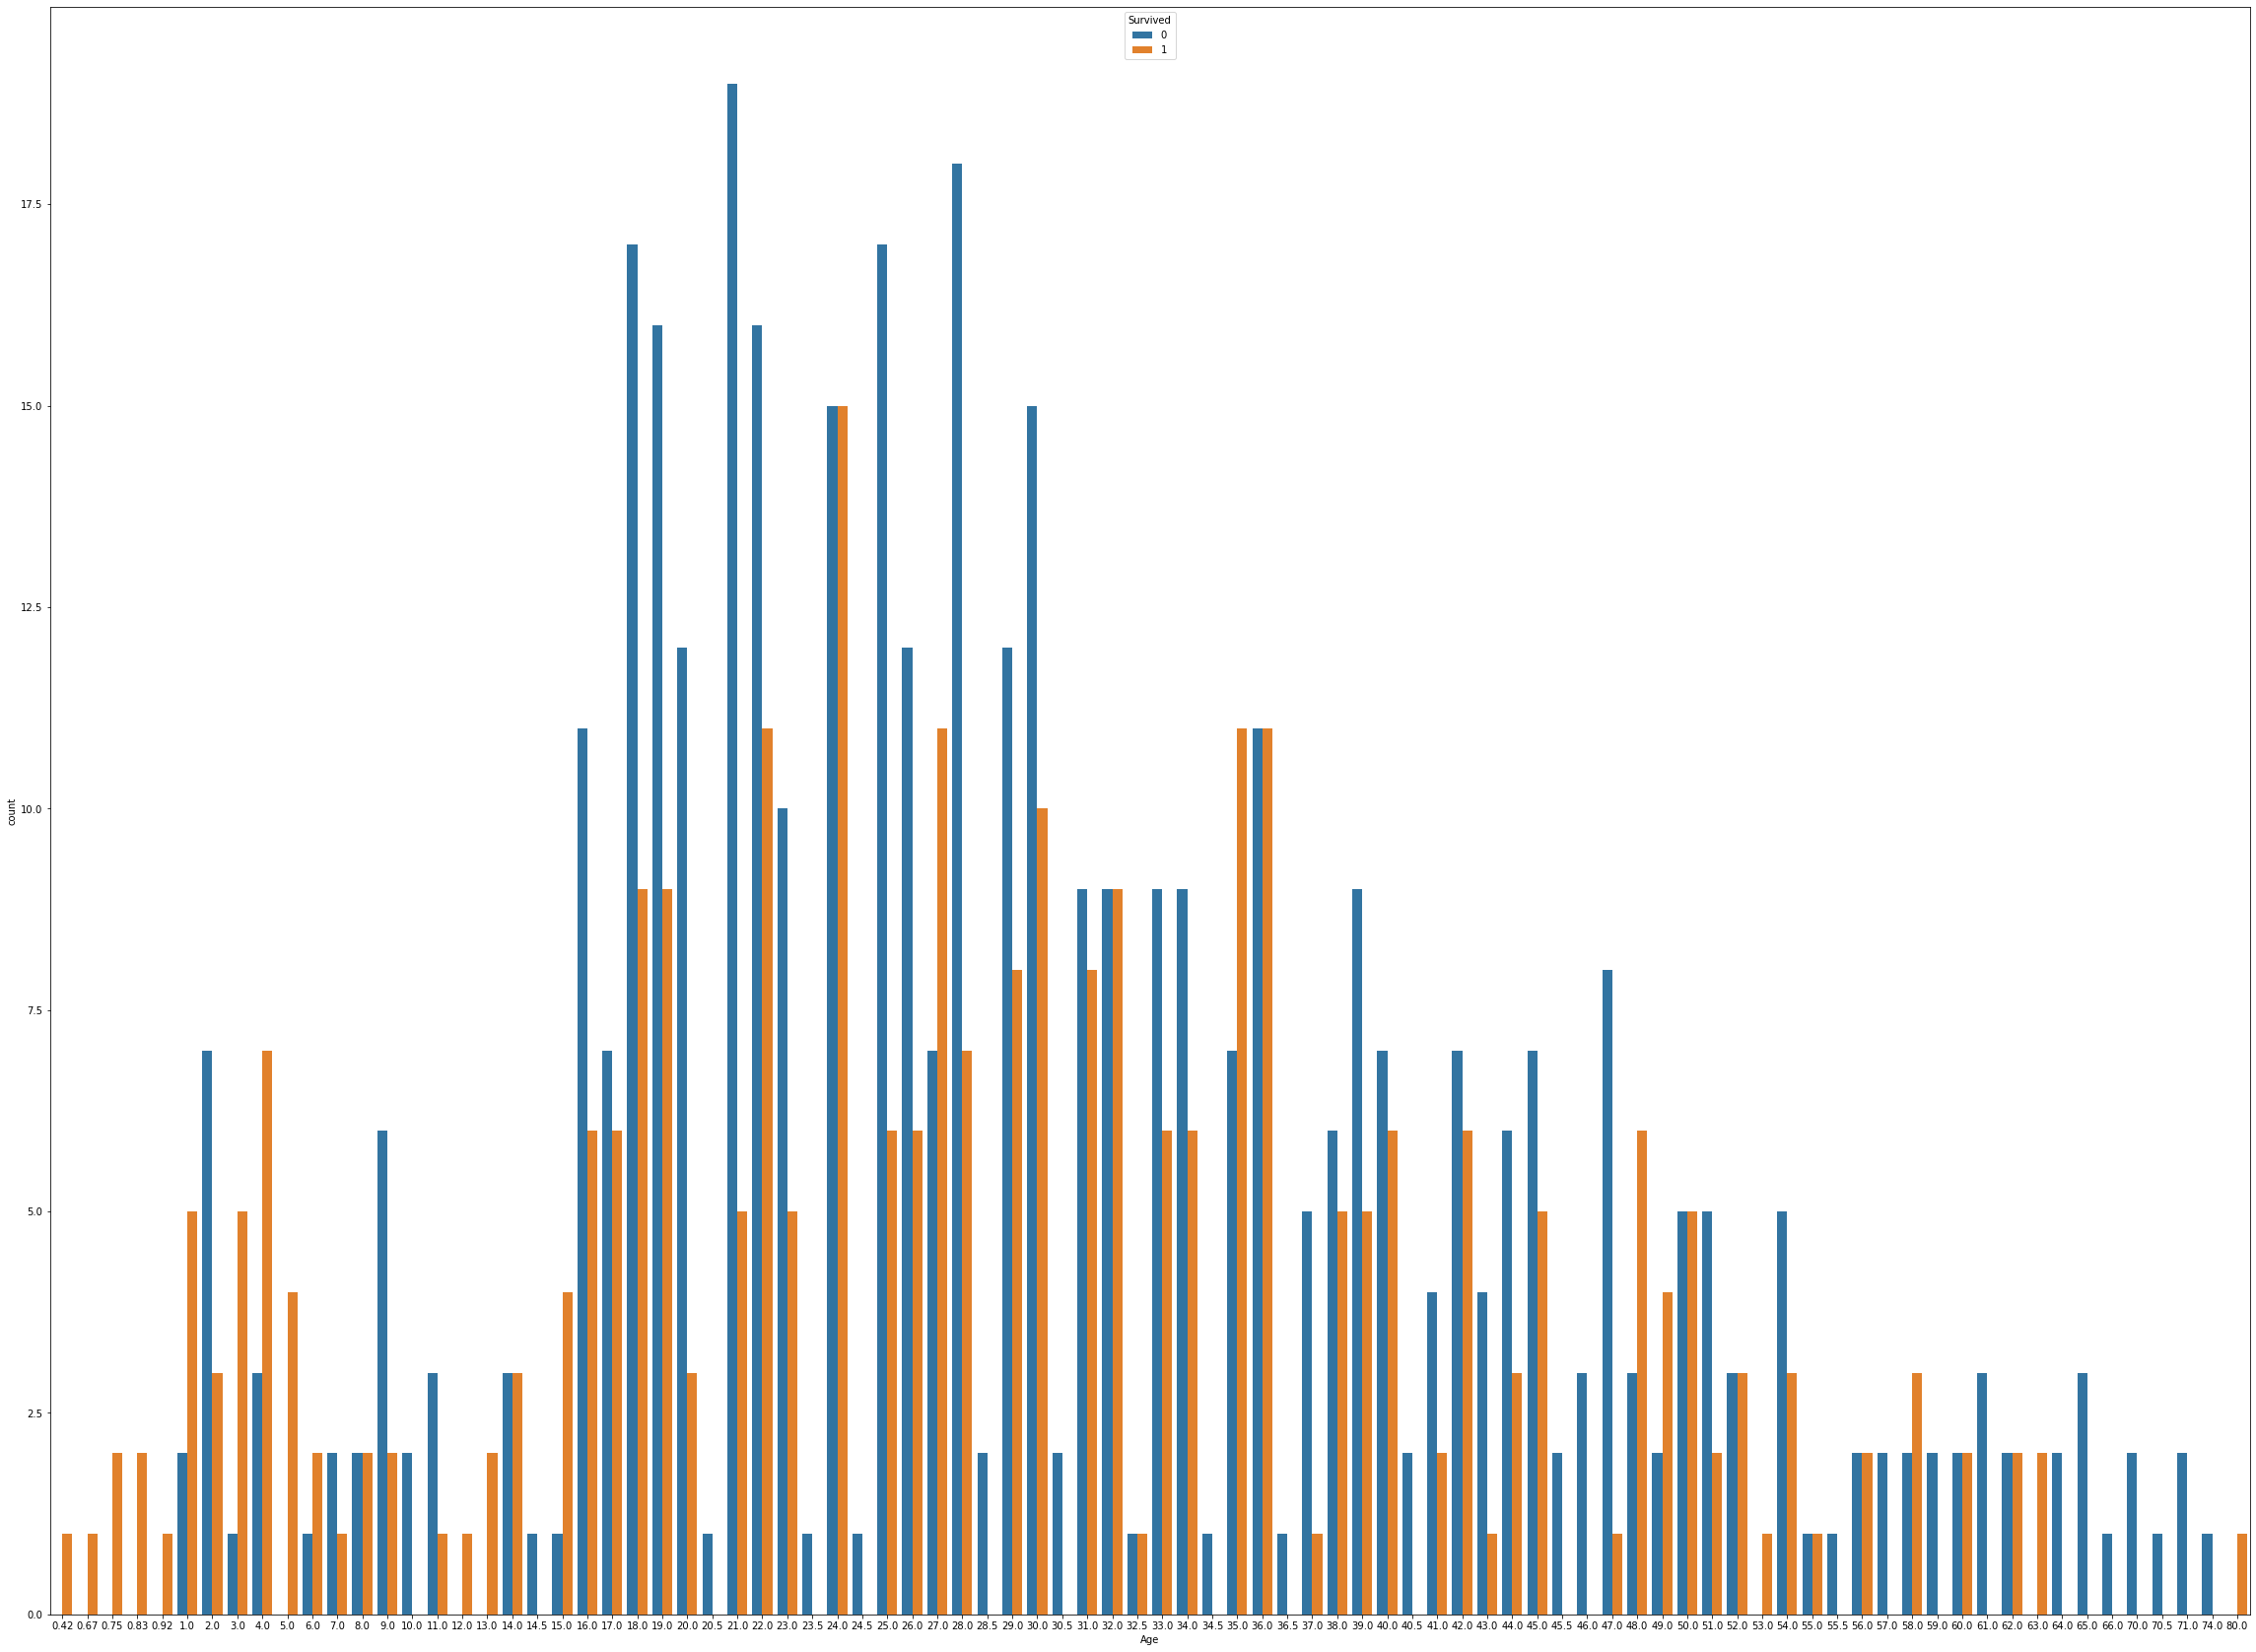

In [12]:
plt.figure(figsize=(40,30))
sns.countplot(x="Age" ,hue = "Survived", data= training_set)

<AxesSubplot:>

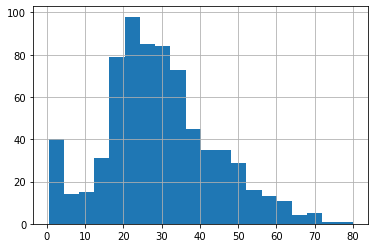

In [13]:
training_set['Age'].hist(bins = 20)

<AxesSubplot:>

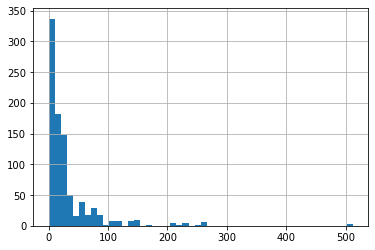

In [14]:
training_set['Fare'].hist(bins = 50)

# Prepare Data for  Training


<AxesSubplot:>

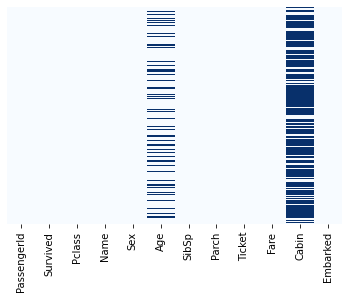

In [15]:
sns.heatmap(training_set.isnull(), yticklabels = False , cbar = False ,cmap ="Blues")

In [16]:
training_set.drop("Cabin", axis = 1 , inplace = True)

In [17]:
training_set.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [18]:
training_set.drop(["Name","Ticket","Embarked"], axis = 1 , inplace = True)

<AxesSubplot:>

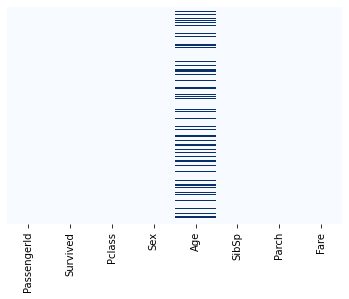

In [19]:
sns.heatmap(training_set.isnull(), yticklabels = False , cbar = False ,cmap ="Blues")

<AxesSubplot:xlabel='Sex', ylabel='Age'>

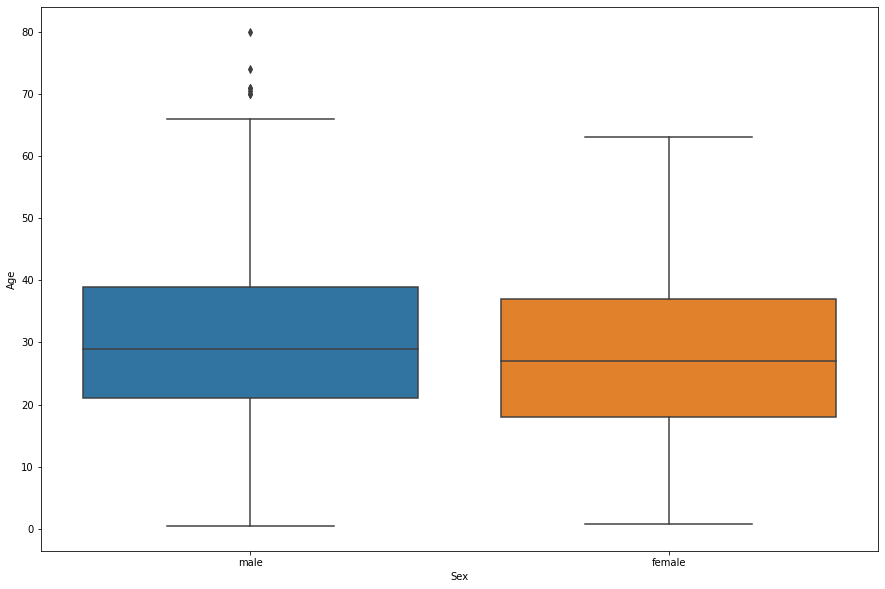

In [20]:
plt.figure(figsize = (15,10))
sns.boxplot(x="Sex", y= "Age" , data = training_set)

In [21]:
def Fill_Age(data): # fill all the missing age data with the average
    age = data[0]
    sex= data[1]
    
    if pd.isnull(age):
        if sex == 'male':
            return 29 
        else:
            return 25
    else:
        return age

In [22]:
training_set['Age']= training_set[['Age','Sex']].apply(Fill_Age,axis=1)

<AxesSubplot:>

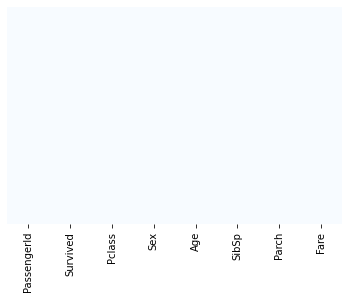

In [23]:
#to check if we got rid of any null elements
sns.heatmap(training_set.isnull(), yticklabels = False , cbar = False ,cmap ="Blues")

<AxesSubplot:>

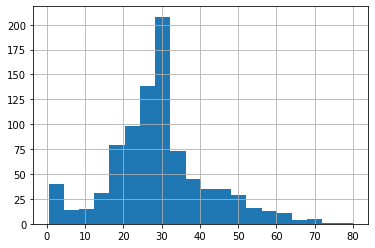

In [24]:
training_set["Age"].hist(bins=20)

In [25]:
training_set.drop(["PassengerId"] , axis = 1 , inplace = True)

In [26]:
male = pd.get_dummies(training_set["Sex"] , drop_first = True ) # to change the sex columns to numbers either 0 and 1

In [27]:
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [28]:
training_set.drop(['Sex'] , axis = 1 , inplace = True)

In [29]:
training_set.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833


In [30]:
training_set = pd.concat([training_set , male], axis = 1 )

In [31]:
X = training_set.drop(["Survived"], axis = 1).values
X

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  1.    ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    , 25.    ,  1.    ,  2.    , 23.45  ,  0.    ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ,  1.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ,  1.    ]])

In [32]:
Y = training_set['Survived'].values
Y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

# Training the Model

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test ,Y_train,Y_test = train_test_split(X , Y ,test_size = 0.2, random_state =10)

In [34]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train , Y_train)

LogisticRegression(random_state=0)


# Testing the Model

In [35]:
Y_predict = classifier.predict(X_test)
Y_predict

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

<AxesSubplot:>

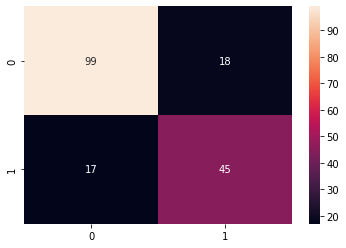

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test , Y_predict)
sns.heatmap(cm , annot=True , fmt='d')

In [37]:
from sklearn.metrics import classification_report
print(classification_report(Y_test ,Y_predict))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.71      0.73      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.81      0.80      0.80       179

